In [4]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd
import sqlite3 
from skfuzzy import control as ctrl

In [5]:
data = pd.read_csv('data.csv', delimiter=',')

In [3]:
data

,age,blood_sugar_level,amount_of_carbohydrates,mass_indexes,risk_of_diabetes
0,6.0,5.00,0.44,20.23,9.64
1,10.0,6.23,0.23,34.47,86.10
2,12.0,3.90,0.36,23.65,43.24
3,17.0,5.34,0.67,13.46,50.52
4,20.0,4.24,0.11,27.32,91.41
5,30.0,6.66,0.76,34.37,76.66
6,34.0,4.79,0.08,38.32,18.79
7,42.0,5.24,0.91,22.37,61.31
8,50.0,2.57,0.55,24.35,70.04
9,61.0,3.02,0.18,55.00,21.40


In [6]:
# Среднее значение для каждого из столбцов
mean_age = data['age'].drop_duplicates().mean()
mean_bsl = data['blood_sugar_level'].drop_duplicates().mean()
mean_aoc = data['amount_of_carbohydrates'].drop_duplicates().mean()
mean_mi = data['mass_indexes'].drop_duplicates().mean()
mean_rd = data['risk_of_diabetes'].drop_duplicates().mean()

In [7]:
#Стандартное отклонение для каждого из столбцов
std_age = data['age'].drop_duplicates().std()
std_bsl = data['blood_sugar_level'].drop_duplicates().std()
std_aoc = data['amount_of_carbohydrates'].drop_duplicates().std()
std_mi = data['mass_indexes'].drop_duplicates().std()
std_rd = data['risk_of_diabetes'].drop_duplicates().std()

In [8]:
age_data = pd.Series(data['age'].drop_duplicates().sort_values().tolist())
bsl_data = pd.Series(data['blood_sugar_level'].drop_duplicates().sort_values().tolist())
aoc_data = pd.Series(data['amount_of_carbohydrates'].drop_duplicates().sort_values().tolist())
mi_data = pd.Series(data['mass_indexes'].drop_duplicates().sort_values().tolist())
rd_data =pd.Series(data['risk_of_diabetes'].drop_duplicates().sort_values().tolist())

In [9]:
age = ctrl.Antecedent(age_data, 'age')

blood_sugar_level = ctrl.Antecedent(bsl_data, 'blood_sugar_level')

amount_of_carbohydrates = ctrl.Antecedent(aoc_data, 'amount_of_carbohydrates')

mass_indexes= ctrl.Antecedent(mi_data, 'mass_indexes')


risk_of_diabetes = ctrl.Consequent(rd_data, 'risk_of_diabetes')



In [10]:
# Подготовка данных age для отрезков low, medium, high
low_data_age = age_data[age_data <= (mean_age)]
medium_data_age = age_data[((mean_age - std_age) <= age_data) & (age_data <= (mean_age + std_age))]
high_data_age = age_data[age_data >= (mean_age)]

In [11]:
# Подготовка данных blood_sugar_level для отрезков low, medium, high
low_data_bsl = bsl_data[bsl_data <= (mean_bsl)]
medium_data_bsl = bsl_data[((mean_bsl - std_bsl) <= bsl_data) & (bsl_data <= (mean_bsl + std_bsl))]
high_data_bsl = bsl_data[bsl_data >= (mean_bsl)]

In [12]:
# Подготовка данных amount_of_carbohydrates для отрезков low, medium, high
low_data_aoc = aoc_data[aoc_data <= (mean_aoc)]
medium_data_aoc = aoc_data[((mean_aoc - std_aoc) <= aoc_data) & (aoc_data <= (mean_aoc + std_aoc))]
high_data_aoc = aoc_data[aoc_data >= (mean_aoc)]

In [13]:
# Подготовка данных mass_indexes для отрезков low, medium, high
low_data_mi = mi_data[mi_data <= (mean_mi)]
medium_data_mi = mi_data[((mean_mi - std_mi) <= mi_data) & (mi_data <= (mean_mi + std_mi))]
high_data_mi = mi_data[mi_data >= (mean_mi)]

In [14]:
# Подготовка данных risk_of_diabetes для отрезков low, medium, high
low_data_rd = rd_data[rd_data <= (mean_rd)]
medium_data_rd = rd_data[((mean_rd - std_rd) <= rd_data) & (rd_data <= (mean_rd + std_rd))]
high_data_rd = rd_data[rd_data >= (mean_rd)]

In [15]:
# Назначение функций принадлежности
age['young'] = fuzz.trimf(np.array(age_data),[low_data_age.min(),low_data_age.min(),low_data_age.max()])
age['middle']= fuzz.trimf(np.array(age_data),[medium_data_age.min(),medium_data_age.min()+(medium_data_age.max() - medium_data_age.min())/2,medium_data_age.max()])
age['old'] = fuzz.trimf(np.array(age_data),[high_data_age.min(),high_data_age.max(),high_data_age.max()])

In [16]:
# Назначение функций принадлежности для blood_sugar_level
blood_sugar_level['low'] = fuzz.trimf(np.array(bsl_data),[low_data_bsl.min(),low_data_bsl.min(),low_data_bsl.max()])
blood_sugar_level['middle']= fuzz.trimf(np.array(bsl_data),[medium_data_bsl.min(),medium_data_bsl.min()+(medium_data_bsl.max() - medium_data_bsl.min())/2,medium_data_bsl.max()])
blood_sugar_level['high'] = fuzz.trimf(np.array(bsl_data),[high_data_bsl.min(),high_data_bsl.max(),high_data_bsl.max()])

In [17]:
# Назначение функций принадлежности для amount_of_carbohydrates
amount_of_carbohydrates['low'] = fuzz.trimf(np.array(aoc_data),[low_data_aoc.min(),low_data_aoc.min(),low_data_aoc.max()])
amount_of_carbohydrates['middle']= fuzz.trimf(np.array(aoc_data),[medium_data_aoc.min(),medium_data_aoc.min()+(medium_data_aoc.max() - medium_data_aoc.min())/2,medium_data_aoc.max()])
amount_of_carbohydrates['high'] = fuzz.trimf(np.array(aoc_data),[high_data_aoc.min(),high_data_aoc.max(),high_data_aoc.max()])

In [18]:
# Назначение функций принадлежности для mass_indexes
mass_indexes['low'] = fuzz.trimf(np.array(mi_data),[low_data_mi.min(),low_data_mi.min(),low_data_mi.max()])
mass_indexes['middle']= fuzz.trimf(np.array(mi_data),[medium_data_mi.min(),medium_data_mi.min()+(medium_data_mi.max() - medium_data_mi.min())/2,medium_data_mi.max()])
mass_indexes['high'] = fuzz.trimf(np.array(mi_data),[high_data_mi.min(),high_data_mi.max(),high_data_mi.max()])

In [24]:
# Назначение функций принадлежности для risk_of_diabetes
risk_of_diabetes['low'] = fuzz.trimf(np.array(rd_data),[low_data_rd.min(),low_data_rd.min(),low_data_rd.max()])
risk_of_diabetes['middle']= fuzz.trimf(np.array(rd_data),[medium_data_rd.min(),medium_data_rd.min()+(medium_data_rd.max() - medium_data_rd.min())/2,medium_data_rd.max()])
risk_of_diabetes['high'] = fuzz.trimf(np.array(rd_data),[high_data_rd.min(),high_data_rd.max(),high_data_rd.max()])

c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


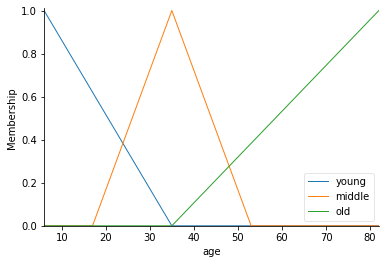

In [41]:
age.view()

c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


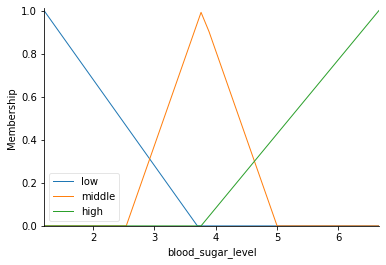

In [44]:
blood_sugar_level.view()

c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


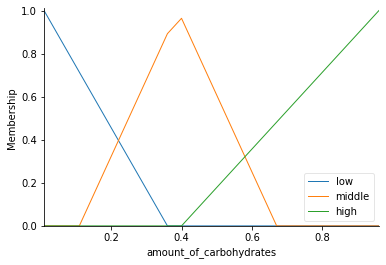

In [24]:
amount_of_carbohydrates.view()


c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


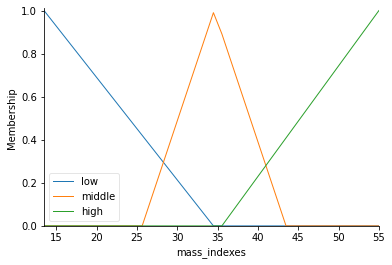

In [20]:
mass_indexes.view()

c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


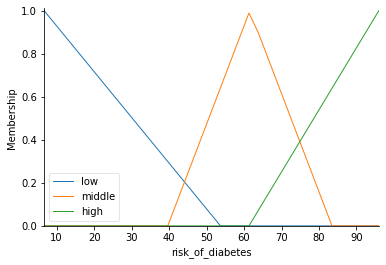

In [21]:
risk_of_diabetes.view()

In [8]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

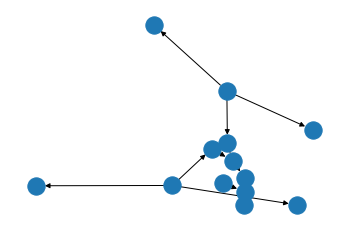

In [9]:
rule1.view()


In [10]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


In [11]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)


In [12]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.847607361963192


c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


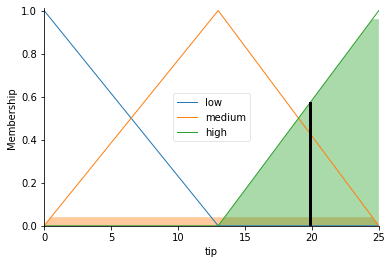

In [13]:
print(tipping.output['tip'])
tip.view(sim=tipping)

In [25]:
rules = [
    ctrl.Rule(blood_sugar_level['high'], risk_of_diabetes['high']),
    ctrl.Rule(mass_indexes['high'], risk_of_diabetes['high']),
    ctrl.Rule((age['young'] | age['old']) & amount_of_carbohydrates['high'], risk_of_diabetes['high']),
    ctrl.Rule(
        (blood_sugar_level['low'] | blood_sugar_level['middle']) & 
        (mass_indexes['low'] | mass_indexes['middle']) & 
        (age['young'] | age['old']) &
        (amount_of_carbohydrates['low'] | amount_of_carbohydrates['middle']), 
        risk_of_diabetes['middle']
    ),
    ctrl.Rule(
        (blood_sugar_level['low'] | blood_sugar_level['middle']) & 
        (mass_indexes['low'] | mass_indexes['middle']) & 
        age['middle'] &
        (amount_of_carbohydrates['low'] | amount_of_carbohydrates['middle']),
        risk_of_diabetes['low']
    ),
]

In [28]:
diabet_risk_ctrl = ctrl.ControlSystem(rules)
diabet_risk = ctrl.ControlSystemSimulation(diabet_risk_ctrl)

In [30]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
diabet_risk.input['blood_sugar_level'] = 5.5
diabet_risk.input['mass_indexes'] = 31.7
diabet_risk.input['age'] = 15
diabet_risk.input['amount_of_carbohydrates'] = 0.56

# Crunch the numbers
diabet_risk.compute()

83.09628571428571


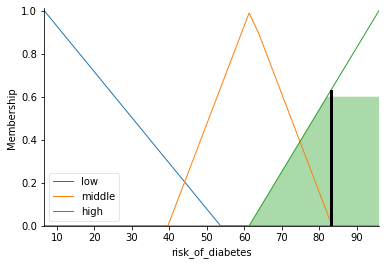

In [31]:
print(diabet_risk.output['risk_of_diabetes'])
risk_of_diabetes.view(sim=diabet_risk)